In [7]:
# Loading the fashion_mnsit datsaset

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
import matplotlib.pyplot as plt

In [3]:
x_train.shape

(60000, 28, 28)

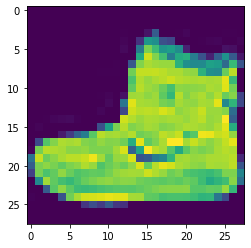

In [4]:
# Ensuring the image in train data
plt.imshow(x_train[0])

In [5]:
# Normalizing the x_train and x_test data
x_train.max()

255

In [6]:
x_train = x_train/255

In [7]:
x_test = x_test/255

In [8]:
x_train[0].shape

(28, 28)

In [9]:
# Reshape to add the 4the dimension of the single channel
x_train = x_train.reshape(60000,28,28,1)

In [10]:
x_test = x_test.reshape(10000,28,28,1)

In [11]:
x_train[0].shape

(28, 28, 1)

In [12]:
# Convert the labels into the categorical labels
from tensorflow.keras.utils import to_categorical

In [13]:
# 10 represents the number of classes in which we need to divide the categories
y_cat_train = to_categorical(y_train, 10)

In [14]:
y_cat_test = to_categorical(y_test, 10)

In [15]:
# Building the model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics=["accuracy"])


In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Training the model

model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4042 - accuracy: 0.8548 - val_loss: 0.3385 - val_accuracy: 0.8775
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2766 - accuracy: 0.8996 - val_loss: 0.3367 - val_accuracy: 0.8760
Epoch 3/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2335 - accuracy: 0.9132 - val_loss: 0.2610 - val_accuracy: 0.9063


In [23]:
model.metrics_names

['loss', 'accuracy']

In [24]:
import pandas as pd

metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

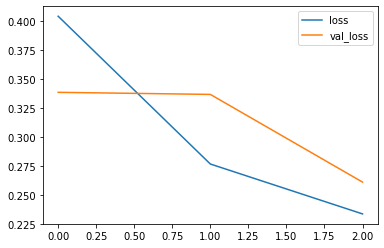

In [27]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

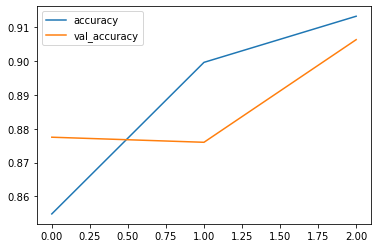

In [28]:
metrics[['accuracy', 'val_accuracy']].plot()

In [29]:
from sklearn.metrics import classification_report

In [30]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.91      0.92      0.92      1000
           4       0.80      0.89      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.78      0.67      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [32]:
# Saving the model
model.save('CNN_fashion_MNIST.h5')

In [1]:
# Testing the Model
import tensorflow as tf

In [5]:
# Loading the model
new_model = tf.keras.models.load_model("CNN_fashion_MNIST.h5")

In [6]:
# Model Summary
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


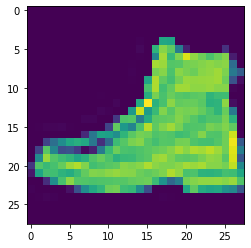

In [20]:
# Inspecting the image
plt.imshow(x_test[39])

In [21]:
# reshaping the image and feeding it into the model
model.predict_classes(x_test[39].reshape(1,28,28,1))

array([9], dtype=int64)

In [ ]:
# 9 == Ankle Boot